In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def CalcTrueRange(high, low, cpy):
    a = high-low
    b = abs(high-cpy)
    c = abs(low-cpy)
    TR = max(a , b ,c )
    return TR

In [3]:
def CalcAverageTrueRange(data, period):
    def CalcTrueRange(high, low, cpy):
        a = high-low
        b = abs(high-cpy)
        c = abs(low-cpy)
        TR = max(a , b ,c )
        return TR
    ATRlist = []
    
    for i in range(period, len(data)):
        tr = CalcTrueRange(data['High'].iloc[i], data['Low'].iloc[i], data['Close'].iloc[i-1])
        # atr = tr if i == NOP else ( AtrList[-1] * (NOP - 1) + tr) / NOP
        
        if i==period:
            atr=tr
        else:
            atr=( ATRlist[-1] * (period - 1) + tr) / period
        ATRlist.append(atr)
    
    return pd.Series( ATRlist , index=data.index[period:])

In [4]:
period = 14 
data =  yf.download('TSLA', start='2021-05-23', end='2023-05-27',interval='1d')


[*********************100%***********************]  1 of 1 completed


In [5]:
atr = CalcAverageTrueRange(data, period)


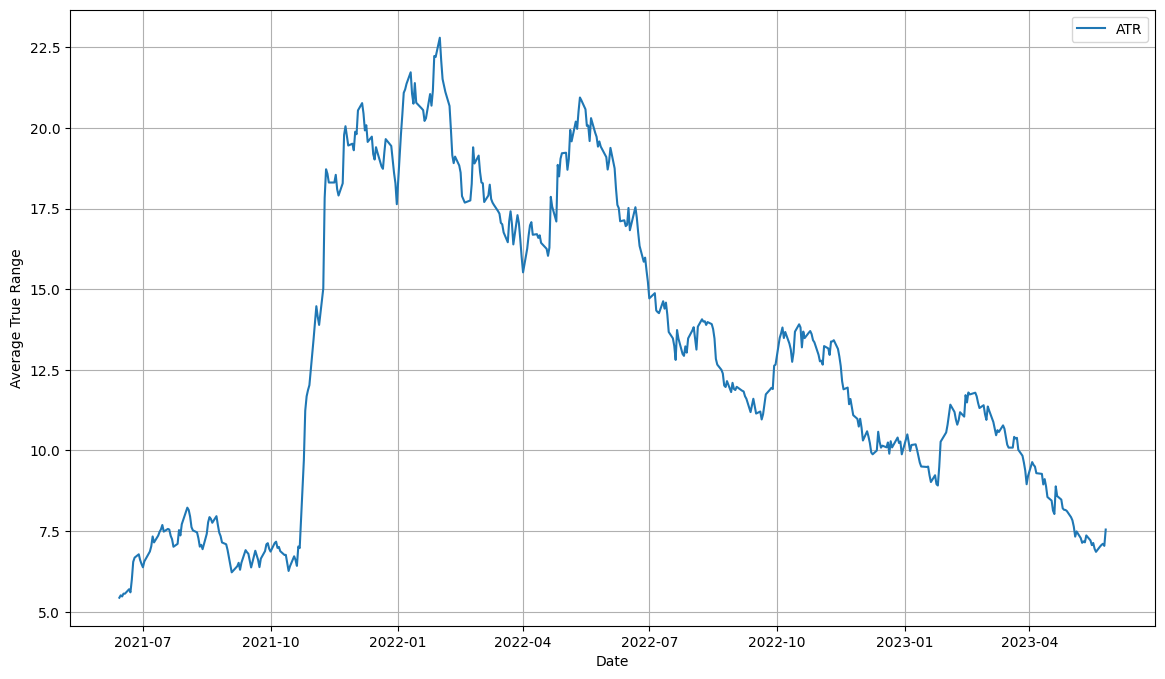

In [6]:
plt.figure(figsize=(14, 8))
plt.xlabel('Date')
plt.ylabel('Average True Range')
plt.grid()
plt.plot( atr , label = 'ATR')
plt.legend()
